# Project: Investigate a Dataset - [Fifa Soccer database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#question1W">New Data Frame for Question 1</a></li>
        <li><a href="#question2W">New Data Frame for Question 2</a></li>  
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#question1">Question 1</a></li>
        <li><a href="#question2">Question 2</a></li>  
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Soccer Fifa database is awsome database that contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. It contain several leagues (Spain LIGA BBVA, England Premier League, France Ligue 1, and others).


### Question 1 for Analysis
> What is the best team in the world over the period from 2008 to 2016?

> What is the most league that has unpredicted matches scores in bets websites?

In [1]:
# Importing Necessary packages 

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Connection with the database

In [2]:
# database path
database_path = r"C:\Users\zizo\Downloads\DA prof project\European Soccer database\database.sqlite"

# connect to the database
connection = sqlite3.connect(database_path)

### First, taking a look to the whole database

#### Create Function to avoid repetition of  tables queries.

In [3]:
def show_table(table_name, connection):
    """
    show_table is a function that's make a SQLite Query for showing a specific table
    
    Args:
    table_name: which is the name of the table in the database.
    connection: Connection object with specific database file.
    
    Returns:
    df: return a dataframe object which of the table, and if the table dosen't exist it return empty dataframe
    """
    try:
        qurey_string = """SELECT *
                    FROM {}""".format(table_name)
        df = pd.read_sql(qurey_string, connection)
        return df
    except Exception:
        return pd.DataFrame({})

In [4]:
countries = show_table('Country', connection)

countries.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [5]:
league = show_table('League', connection)

league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [6]:
# Collecting leagues unique values to use later
leagues = list(league.name)

leagues

['Belgium Jupiler League',
 'England Premier League',
 'France Ligue 1',
 'Germany 1. Bundesliga',
 'Italy Serie A',
 'Netherlands Eredivisie',
 'Poland Ekstraklasa',
 'Portugal Liga ZON Sagres',
 'Scotland Premier League',
 'Spain LIGA BBVA',
 'Switzerland Super League']

In [7]:
team = show_table('Team', connection)

team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [8]:
Match = show_table('Match', connection)

Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


### Importing Match tables with only used columns

In [9]:
# Importing of needed columns from matches dataframe

matches_df = pd.read_sql("""SELECT Match.id,
                                        Country.name AS country_name,
                                        League.name AS league_name,
                                        season, stage, date,
                                        HomeTeam.team_long_name AS home_team,
                                        AwayTeam.team_long_name AS away_team,
                                        home_team_goal, away_team_goal, 
                                        B365H, B365D, B365A,
                                        BWH, BWD, BWA,
                                        IWH, IWD, IWA, 
                                        LBH, LBD, LBA,
                                        WHH, WHD, WHA,
                                        SJH, SJD, SJA,
                                        VCH, VCD, VCA,
                                        GBH, GBD, GBA,
                                        BSH, BSD, BSA
                                    FROM Match
                                    JOIN Country on Country.id = Match.country_id
                                    JOIN League on League.id = Match.league_id
                                    LEFT JOIN Team AS HomeTeam on HomeTeam.team_api_id = Match.home_team_api_id
                                    LEFT JOIN Team AS AwayTeam on AwayTeam.team_api_id = Match.away_team_api_id
                                    ORDER by date;""", connection)

matches_df.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24562,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24613,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
matches_df.shape

(25979, 37)

In [11]:
matches_df.columns

Index(['id', 'country_name', 'league_name', 'season', 'stage', 'date',
       'home_team', 'away_team', 'home_team_goal', 'away_team_goal', 'B365H',
       'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH',
       'LBD', 'LBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD',
       'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object')

In [12]:
matches_df.dtypes

id                  int64
country_name       object
league_name        object
season             object
stage               int64
date               object
home_team          object
away_team          object
home_team_goal      int64
away_team_goal      int64
B365H             float64
B365D             float64
B365A             float64
BWH               float64
BWD               float64
BWA               float64
IWH               float64
IWD               float64
IWA               float64
LBH               float64
LBD               float64
LBA               float64
WHH               float64
WHD               float64
WHA               float64
SJH               float64
SJD               float64
SJA               float64
VCH               float64
VCD               float64
VCA               float64
GBH               float64
GBD               float64
GBA               float64
BSH               float64
BSD               float64
BSA               float64
dtype: object


### Data Cleaning
> Converting the date to datetime object

> Creating Match Points columns 

> Divided the data to two datasets for every question

> Clean Every Dataset again

#### Conveting the date from String into datetime object

In [13]:
matches_df['date'] = pd.to_datetime(matches_df['date'])

#### Creating match points columns

In [14]:
# First Create the two columns from another column datatype as we want our new columns to be
# To Avoid changing the data type later

matches_df['home_points'] = matches_df['stage']
matches_df['away_points'] = matches_df['stage']

# Change The values with points --> 3 for win , 1 for draw , 0 for loss
for i in range(len(matches_df['home_points'])):
    if matches_df['home_team_goal'][i] > matches_df['away_team_goal'][i]:
        matches_df['home_points'][i] = 3
        matches_df['away_points'][i] = 0
    
    elif matches_df['home_team_goal'][i] < matches_df['away_team_goal'][i]:
        matches_df['home_points'][i] = 0
        matches_df['away_points'][i] = 3
        
    else:
        matches_df['home_points'][i] = 1
        matches_df['away_points'][i] = 1

<ipython-input-14-aed244848c1d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_df['home_points'][i] = 0
<ipython-input-14-aed244848c1d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_df['away_points'][i] = 3
<ipython-input-14-aed244848c1d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_df['home_points'][i] = 3
<ipython-input-14-aed244848c1d>:11: SettingWithCopyWarning: 
A value is trying to be set on a 

#### Creating function to convert our dataframe to new one without unwanted coumns

In [15]:
def clear_df(df, dropped_columns):
    """
    clear_df is a function that take a dataframe object, and dropped the unwanted columns from it.
    
    arguments:
    df: The copied dataframe
    dropped_columns: unwanted columns list
    
    return:
    df_new : The New dataframe
    """
    df_new = df.copy()
    df_new.drop(dropped_columns, axis=1, inplace=True)
    return df_new

<a id='question1W'></a>
### First Question dataframe

In [16]:
first_df = clear_df(matches_df, ['id', 'B365H','B365D', 'B365A', 'BWH', 'BWD', 'BWA', 
                                'IWH', 'IWD', 'IWA', 'LBH','LBD', 'LBA', 'WHH', 'WHD', 
                                'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD','VCA', 'GBH', 
                                'GBD', 'GBA', 'BSH', 'BSD', 'BSA'])
first_df.head()

,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,home_points,away_points
0,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18,BSC Young Boys,FC Basel,1,2,0,3
1,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19,FC Aarau,FC Sion,3,1,3,0
2,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20,FC Luzern,FC Vaduz,1,2,0,3
3,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20,Neuchâtel Xamax,FC Zürich,1,2,0,3
4,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23,FC Basel,Grasshopper Club Zürich,1,0,3,0


In [17]:
first_df.shape

(25979, 11)

In [18]:
first_df.dtypes

country_name              object
league_name               object
season                    object
stage                      int64
date              datetime64[ns]
home_team                 object
away_team                 object
home_team_goal             int64
away_team_goal             int64
home_points                int64
away_points                int64
dtype: object

In [19]:
first_df.season.value_counts()

2015/2016    3326
2008/2009    3326
2014/2015    3325
2010/2011    3260
2012/2013    3260
2009/2010    3230
2011/2012    3220
2013/2014    3032
Name: season, dtype: int64

In [20]:
first_df.duplicated().sum()

0

In [21]:
first_df.isnull().sum()

country_name      0
league_name       0
season            0
stage             0
date              0
home_team         0
away_team         0
home_team_goal    0
away_team_goal    0
home_points       0
away_points       0
dtype: int64

Data Wrangling for Question 1 has been finished

<a id='question2W'></a>
### Question 2 dataframe

In [22]:
second_df = clear_df(matches_df, ['id', 'country_name', 'stage'])
second_df.head()

,league_name,season,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_points,away_points
0,Switzerland Super League,2008/2009,2008-07-18,BSC Young Boys,FC Basel,1,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
1,Switzerland Super League,2008/2009,2008-07-19,FC Aarau,FC Sion,3,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
2,Switzerland Super League,2008/2009,2008-07-20,FC Luzern,FC Vaduz,1,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
3,Switzerland Super League,2008/2009,2008-07-20,Neuchâtel Xamax,FC Zürich,1,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
4,Switzerland Super League,2008/2009,2008-07-23,FC Basel,Grasshopper Club Zürich,1,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0


In [23]:
second_df.shape

(25979, 36)

In [24]:
second_df.isnull().sum()

league_name           0
season                0
date                  0
home_team             0
away_team             0
home_team_goal        0
away_team_goal        0
B365H              3387
B365D              3387
B365A              3387
BWH                3404
BWD                3404
BWA                3404
IWH                3459
IWD                3459
IWA                3459
LBH                3423
LBD                3423
LBA                3423
WHH                3408
WHD                3408
WHA                3408
SJH                8882
SJD                8882
SJA                8882
VCH                3411
VCD                3411
VCA                3411
GBH               11817
GBD               11817
GBA               11817
BSH               11818
BSD               11818
BSA               11818
home_points           0
away_points           0
dtype: int64

#### Showing two methods of drop NaN values and choose the best of them 

In [25]:
#First Drop the rows
second_df.dropna()

,league_name,season,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_points,away_points
22,France Ligue 1,2008/2009,2008-08-09,AJ Auxerre,FC Nantes,2,1,2.10,3.1,3.75,...,2.9,3.75,2.10,3.00,3.75,2.00,2.88,3.75,3,0
23,France Ligue 1,2008/2009,2008-08-09,Girondins de Bordeaux,SM Caen,2,1,1.57,3.6,6.50,...,3.3,5.50,1.57,3.60,6.00,1.50,3.50,6.50,3,0
24,France Ligue 1,2008/2009,2008-08-09,Le Havre AC,OGC Nice,1,0,2.30,3.0,3.40,...,2.9,3.00,2.35,2.90,3.20,2.38,2.88,2.88,3,0
25,France Ligue 1,2008/2009,2008-08-09,Le Mans FC,FC Lorient,0,1,2.10,3.1,3.80,...,2.9,3.75,2.00,3.10,3.75,1.91,3.00,4.00,0,3
26,France Ligue 1,2008/2009,2008-08-09,AS Monaco,Paris Saint-Germain,1,0,2.40,3.1,3.10,...,3.0,3.00,2.38,3.00,3.00,2.30,3.00,2.88,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,Spain LIGA BBVA,2012/2013,2013-06-01,RC Deportivo de La Coruña,Real Sociedad,0,1,2.60,3.5,2.60,...,3.8,2.60,2.55,3.80,2.40,2.55,3.50,2.55,0,3
16278,Spain LIGA BBVA,2012/2013,2013-06-01,FC Barcelona,Málaga CF,4,1,1.25,6.0,10.00,...,6.5,11.00,1.25,6.25,9.00,1.25,6.00,10.00,3,0
16280,Spain LIGA BBVA,2012/2013,2013-06-01,Real Zaragoza,Atlético Madrid,1,3,2.20,3.5,3.10,...,3.5,3.20,2.25,3.60,2.90,2.20,3.40,3.15,0,3
16281,Spain LIGA BBVA,2012/2013,2013-06-01,Levante UD,Real Betis Balompié,1,1,3.20,3.4,2.20,...,3.7,2.20,3.30,3.40,2.10,3.20,3.40,2.15,1,1


In [26]:
# Drop the 2 websites that has the most NaN values, then drop the rows
test_df = clear_df(second_df, ['GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'])
test_df.dropna()

,league_name,season,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,...,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,home_points,away_points
22,France Ligue 1,2008/2009,2008-08-09,AJ Auxerre,FC Nantes,2,1,2.10,3.10,3.75,...,2.88,3.3,2.15,3.00,3.8,2.00,2.90,3.75,3,0
23,France Ligue 1,2008/2009,2008-08-09,Girondins de Bordeaux,SM Caen,2,1,1.57,3.60,6.50,...,3.30,6.0,1.50,3.80,7.5,1.60,3.30,5.50,3,0
24,France Ligue 1,2008/2009,2008-08-09,Le Havre AC,OGC Nice,1,0,2.30,3.00,3.40,...,2.80,3.0,2.40,3.10,3.1,2.30,2.90,3.00,3,0
25,France Ligue 1,2008/2009,2008-08-09,Le Mans FC,FC Lorient,0,1,2.10,3.10,3.80,...,3.00,3.4,2.00,3.20,4.0,2.00,2.90,3.75,0,3
26,France Ligue 1,2008/2009,2008-08-09,AS Monaco,Paris Saint-Germain,1,0,2.40,3.10,3.10,...,2.90,2.9,2.40,3.00,3.2,2.25,3.00,3.00,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19759,Spain LIGA BBVA,2014/2015,2014-09-14,Valencia CF,RCD Espanyol,3,1,1.62,3.75,5.50,...,3.60,6.0,1.62,3.75,5.5,1.65,3.80,5.75,3,0
19760,Spain LIGA BBVA,2014/2015,2014-09-14,Sevilla FC,Getafe CF,2,0,1.44,4.33,7.00,...,4.00,7.0,1.40,4.33,7.0,1.45,4.50,8.00,3,0
19761,Spain LIGA BBVA,2014/2015,2014-09-14,Rayo Vallecano,Elche CF,2,3,1.73,3.50,5.00,...,3.25,5.0,1.73,3.50,4.8,1.80,3.60,5.20,0,3
19762,Spain LIGA BBVA,2014/2015,2014-09-14,Granada CF,Villarreal CF,0,0,3.50,3.20,2.15,...,3.10,2.2,3.40,3.13,2.1,3.75,3.25,2.20,1,1


First method: Produced 14040 row for 9 websites, Second method: Produced 16980  row for only 7 websites.
#### So I choose the first method.

In [27]:
second_df = second_df.dropna()
second_df = second_df.reset_index(drop=True)
second_df

,league_name,season,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_points,away_points
0,France Ligue 1,2008/2009,2008-08-09,AJ Auxerre,FC Nantes,2,1,2.10,3.1,3.75,...,2.9,3.75,2.10,3.00,3.75,2.00,2.88,3.75,3,0
1,France Ligue 1,2008/2009,2008-08-09,Girondins de Bordeaux,SM Caen,2,1,1.57,3.6,6.50,...,3.3,5.50,1.57,3.60,6.00,1.50,3.50,6.50,3,0
2,France Ligue 1,2008/2009,2008-08-09,Le Havre AC,OGC Nice,1,0,2.30,3.0,3.40,...,2.9,3.00,2.35,2.90,3.20,2.38,2.88,2.88,3,0
3,France Ligue 1,2008/2009,2008-08-09,Le Mans FC,FC Lorient,0,1,2.10,3.1,3.80,...,2.9,3.75,2.00,3.10,3.75,1.91,3.00,4.00,0,3
4,France Ligue 1,2008/2009,2008-08-09,AS Monaco,Paris Saint-Germain,1,0,2.40,3.1,3.10,...,3.0,3.00,2.38,3.00,3.00,2.30,3.00,2.88,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,Spain LIGA BBVA,2012/2013,2013-06-01,RC Deportivo de La Coruña,Real Sociedad,0,1,2.60,3.5,2.60,...,3.8,2.60,2.55,3.80,2.40,2.55,3.50,2.55,0,3
14036,Spain LIGA BBVA,2012/2013,2013-06-01,FC Barcelona,Málaga CF,4,1,1.25,6.0,10.00,...,6.5,11.00,1.25,6.25,9.00,1.25,6.00,10.00,3,0
14037,Spain LIGA BBVA,2012/2013,2013-06-01,Real Zaragoza,Atlético Madrid,1,3,2.20,3.5,3.10,...,3.5,3.20,2.25,3.60,2.90,2.20,3.40,3.15,0,3
14038,Spain LIGA BBVA,2012/2013,2013-06-01,Levante UD,Real Betis Balompié,1,1,3.20,3.4,2.20,...,3.7,2.20,3.30,3.40,2.10,3.20,3.40,2.15,1,1


In [28]:
second_df.isnull().sum()

league_name       0
season            0
date              0
home_team         0
away_team         0
home_team_goal    0
away_team_goal    0
B365H             0
B365D             0
B365A             0
BWH               0
BWD               0
BWA               0
IWH               0
IWD               0
IWA               0
LBH               0
LBD               0
LBA               0
WHH               0
WHD               0
WHA               0
SJH               0
SJD               0
SJA               0
VCH               0
VCD               0
VCA               0
GBH               0
GBD               0
GBA               0
BSH               0
BSD               0
BSA               0
home_points       0
away_points       0
dtype: int64

In [29]:
second_df.dtypes

league_name               object
season                    object
date              datetime64[ns]
home_team                 object
away_team                 object
home_team_goal             int64
away_team_goal             int64
B365H                    float64
B365D                    float64
B365A                    float64
BWH                      float64
BWD                      float64
BWA                      float64
IWH                      float64
IWD                      float64
IWA                      float64
LBH                      float64
LBD                      float64
LBA                      float64
WHH                      float64
WHD                      float64
WHA                      float64
SJH                      float64
SJD                      float64
SJA                      float64
VCH                      float64
VCD                      float64
VCA                      float64
GBH                      float64
GBD                      float64
GBA       

#### Creating new columns with prediction results


In [30]:
websites = ['B365', 'BW', 'IW', 'LB', 'WH', 'SJ', 'VC', 'GB', 'BS']
for w in websites:
    second_df[w] = second_df['season']

In [31]:
# Looping to filter every 3 columns of every website into single column with the whole prediction value

for i in range(len(second_df.B365H)):
    for w in websites:
        home = w + 'H'
        away = w + 'A'
        draw = w + 'D'
        if(second_df[home][i] > second_df[draw][i]) and (second_df[home][i] > second_df[away][i]):
            second_df[w][i] = 'Home_win'
        elif (second_df[draw][i] > second_df[home][i] and second_df[draw][i] > second_df[away][i]):
            second_df[w][i] = 'Draw'
        else:
            second_df[w][i] = 'Away_win'

<ipython-input-31-3a0f2a4122f0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_df[w][i] = 'Away_win'
<ipython-input-31-3a0f2a4122f0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_df[w][i] = 'Draw'
<ipython-input-31-3a0f2a4122f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_df[w][i] = 'Home_win'


In [32]:
# Dropping the websites columns 

second_df.drop(['B365H','B365D', 'B365A', 
                'BWH', 'BWD', 'BWA', 
                'IWH', 'IWD', 'IWA', 
                'LBH','LBD', 'LBA', 
                'WHH', 'WHD', 'WHA', 
                'SJH', 'SJD', 'SJA', 
                'VCH', 'VCD','VCA',
                'GBH', 'GBD', 'GBA', 
                'BSH', 'BSD', 'BSA'], axis=1, inplace=True)
second_df.head()

,league_name,season,date,home_team,away_team,home_team_goal,away_team_goal,home_points,away_points,B365,BW,IW,LB,WH,SJ,VC,GB,BS
0,France Ligue 1,2008/2009,2008-08-09,AJ Auxerre,FC Nantes,2,1,3,0,Away_win,Away_win,Away_win,Away_win,Away_win,Away_win,Away_win,Away_win,Away_win
1,France Ligue 1,2008/2009,2008-08-09,Girondins de Bordeaux,SM Caen,2,1,3,0,Away_win,Away_win,Away_win,Away_win,Away_win,Away_win,Away_win,Away_win,Away_win
2,France Ligue 1,2008/2009,2008-08-09,Le Havre AC,OGC Nice,1,0,3,0,Away_win,Draw,Away_win,Away_win,Away_win,Away_win,Away_win,Away_win,Away_win
3,France Ligue 1,2008/2009,2008-08-09,Le Mans FC,FC Lorient,0,1,0,3,Away_win,Away_win,Away_win,Away_win,Away_win,Away_win,Away_win,Away_win,Away_win
4,France Ligue 1,2008/2009,2008-08-09,AS Monaco,Paris Saint-Germain,1,0,3,0,Away_win,Draw,Away_win,Draw,Away_win,Away_win,Away_win,Away_win,Draw


#### Editing The bets columns with points

In [33]:
# Looping to change the new websites columns with the new values if it match the match result or not

for i in range(len(second_df['home_points'])):
    for w in websites:
        if (second_df['home_points'][i] == 3 and 
            second_df[w][i] == 'Home_win') or (second_df['home_points'][i] == 1 and 
                                               second_df[w][i] == 'Draw') or (second_df['home_points'][i] == 0 and 
                                                                              second_df[w][i] == 'Away_win'):
            second_df[w][i] = '1'
        else:
            second_df[w][i] = '0'

<ipython-input-33-69ed9d48b06b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_df[w][i] = '0'
<ipython-input-33-69ed9d48b06b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_df[w][i] = '1'


In [34]:
# Change websites columns datatypes
for w in websites:
    second_df[w] = second_df[w].astype('int')

In [35]:
second_df.dtypes

league_name               object
season                    object
date              datetime64[ns]
home_team                 object
away_team                 object
home_team_goal             int64
away_team_goal             int64
home_points                int64
away_points                int64
B365                       int32
BW                         int32
IW                         int32
LB                         int32
WH                         int32
SJ                         int32
VC                         int32
GB                         int32
BS                         int32
dtype: object

#### Creating two columns with total bets and total loss bets

In [36]:
# Create new column with the total prediction of the 9 websites

second_df['total_prediction'] = second_df['B365'] + second_df['BW'] + second_df['IW'] +\
                            second_df['LB'] + second_df['WH'] + second_df['SJ'] +\
                            second_df['VC'] + second_df['GB'] + second_df['BS']

In [37]:
second_df['total_prediction'].value_counts()

0    9906
9    2032
1     552
2     334
8     330
3     229
7     192
4     159
6     153
5     153
Name: total_prediction, dtype: int64

In [38]:
second_df['wrong_prediction'] = 9 - second_df['total_prediction']

<a id='eda'></a>
## Exploratory Data Analysis

<a id='question1'></a>
### Research Question 1 (What is the best team in the world over the period from 2008 to 2016?)

#### Showing the most team who got the mean home points, and the most team who got mean away points.

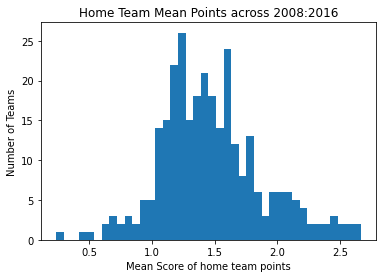

In [39]:
# Histogram of Home matches points of all teams through this period
plt.hist(first_df.groupby(['league_name', 'home_team'])['home_points'].mean(), 40)

# Naming the Graph labels and title. 
plt.xlabel('Mean Score of home team points')
plt.ylabel('Number of Teams')
plt.title('Home Team Mean Points across 2008:2016');

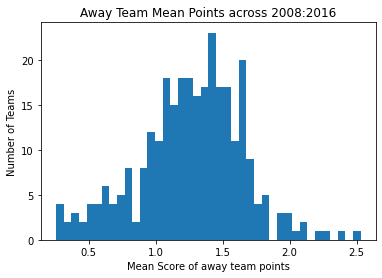

In [40]:
# Histogram of Away matches points of all teams through this period
plt.hist(first_df.groupby(['league_name', 'home_team'])['away_points'].mean(), 40)

# Naming The graph labels and title.
plt.xlabel('Mean Score of away team points')
plt.ylabel('Number of Teams')
plt.title('Away Team Mean Points across 2008:2016');

#### The Team that has the highest mean points over the period

In [41]:
# Sum of Home Points and Away Points

df = pd.DataFrame({'count':((first_df.groupby('away_team')['away_points'].mean() 
                              + first_df.groupby('home_team')['home_points'].mean()))})

In [42]:
# The Team which has the max points through that period

df[df['count'] == df['count'].max()].index[0]

'FC Barcelona'

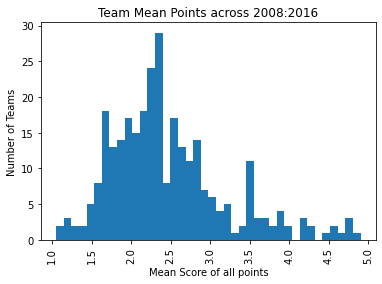

In [43]:
# Histogram to the Mean of total points

plt.hist(df, 40)
plt.xticks(rotation='vertical')
plt.xlabel('Mean Score of all points')
plt.ylabel('Number of Teams')
plt.title('Team Mean Points across 2008:2016');

#### Showing the most league with the avg points

In [44]:
# Getting every league total averge points

avg_points = []
for l in leagues:
    df = first_df[first_df['league_name'] == l]
    avg_points.append(df[['home_points', 'away_points']].sum().sum())

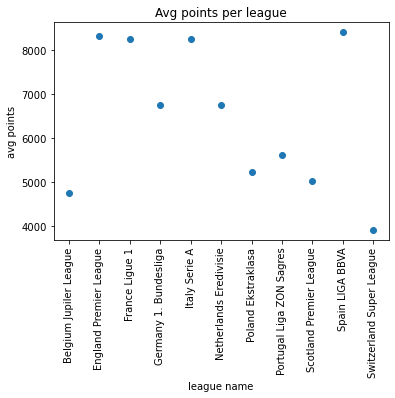

In [45]:
plt.scatter(leagues, avg_points)
plt.xticks(rotation='vertical')
plt.title("Avg points per league")
plt.xlabel('league name')
plt.ylabel('avg points');

### Showing The best team every season

In [46]:
# Unique Values of the Seasons
seasons = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', 
           '2012/2013','2013/2014', '2014/2015', '2015/2016']

In [47]:
# The Best team that has mean points over every season
best_team = []
for s in seasons:
    df = first_df[first_df['season'] == s]
    df = pd.DataFrame({'count':((df.groupby('away_team')['away_points'].mean() 
                                  + df.groupby('home_team')['home_points'].mean()))})
    x = df[df['count'] == df['count'].max()].index[0]
    best_team.append(x)
    print(" - ", s, ' ', x)

 -  2008/2009   Manchester United
 -  2009/2010   FC Barcelona
 -  2010/2011   FC Porto
 -  2011/2012   Real Madrid CF
 -  2012/2013   FC Bayern Munich
 -  2013/2014   Juventus
 -  2014/2015   PSV
 -  2015/2016   FC Bayern Munich


In [48]:
best_team_name = list(set(best_team))
best_team_rec = [0 for t in best_team_name]
for i in range(len(best_team)):
    best_team_rec[best_team_name.index(best_team[i])] += 1

#### Plotting to the clubs who gotted the best team evey season

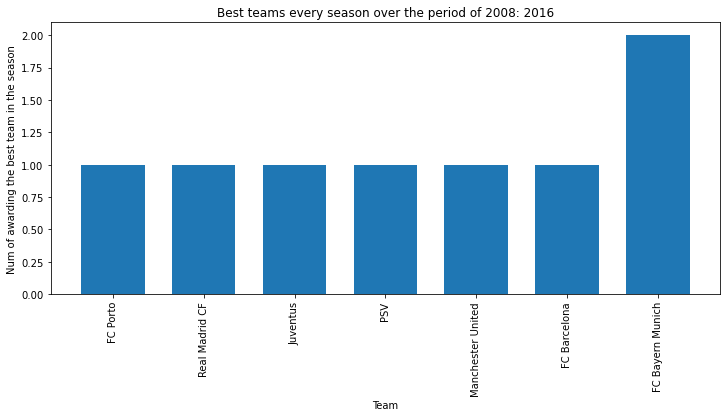

In [49]:
plt.subplots(figsize=(12, 5)) 
plt.bar(best_team_name, best_team_rec, width= 0.7)
plt.xticks(rotation='vertical')
plt.xlabel('Team')
plt.ylabel('Num of awarding the best team in the season')
plt.title('Best teams every season over the period of 2008: 2016');

I found that **FC Barcelona** has the best mean points over the period of 2008:2016, but the best club through the season one time only. Although **FC Bayern Munich** got the best club two times.

So **FC Bayern Munich** is the best club through the period of 2008 to 2016, and **FC Barcelona** is the **second** best club through the same period.

<a id='question2'></a>
### Research Question 2  ( What is the most league that has unpredicted matches scores in bets websites?)

#### Counting the number of wrong bets (totally wrong in all 9 websits) 

In [50]:
pred_wrong = []
length_wrong = []

for l in leagues:
    df = second_df[second_df['league_name'] == l]
    try:
        pred_wrong.append(df.groupby('total_prediction')['total_prediction'].count()[0])
        length_wrong.append(len(df))
    except Exception:
        pred_wrong.append(0)
        length_wrong.append(1)
        
pred_wrong, length_wrong

([850, 1360, 1300, 1030, 1285, 1119, 0, 833, 769, 1360, 0],
 [1198, 1897, 1892, 1527, 1823, 1507, 1, 1168, 1136, 1892, 1])

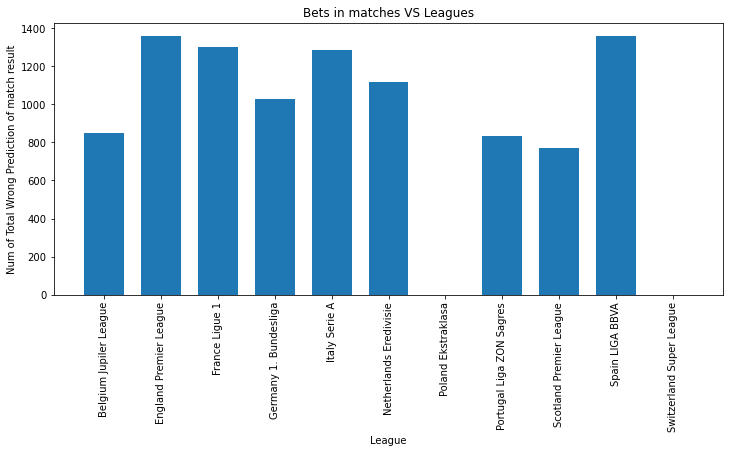

In [51]:
plt.subplots(figsize=(12, 5)) 
plt.bar(leagues, pred_wrong, width= 0.7)
plt.xticks(rotation='vertical')
plt.xlabel('League')
plt.ylabel('Num of Total Wrong Prediction of match result')
plt.title('Bets in matches VS Leagues');

#### Counting the number of wrong bets (either it's totally wrong or not) 

In [52]:
all_wrong = []
for l in leagues:
    df = second_df[second_df['league_name'] == l]
    try:
        all_wrong.append(df['wrong_prediction'].sum())
    except Exception:
        all_wrong.append(0)

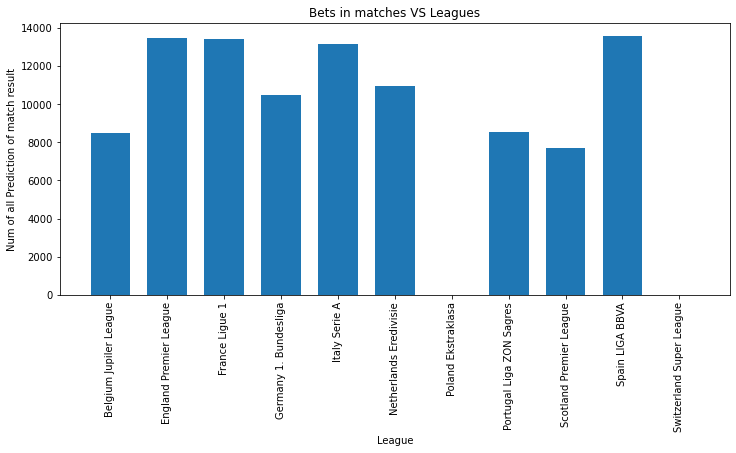

In [53]:
plt.subplots(figsize=(12, 5)) 
plt.bar(leagues, all_wrong, width= 0.7)
plt.xticks(rotation='vertical')
plt.xlabel('League')
plt.ylabel('Num of all Prediction of match result')
plt.title('Bets in matches VS Leagues');

#### Counting the percentage of wrong prediction per match 

In [54]:
percent_wrong = []
for i in range(len(all_wrong)):
    percent_wrong.append(all_wrong[i]/length_wrong[i])


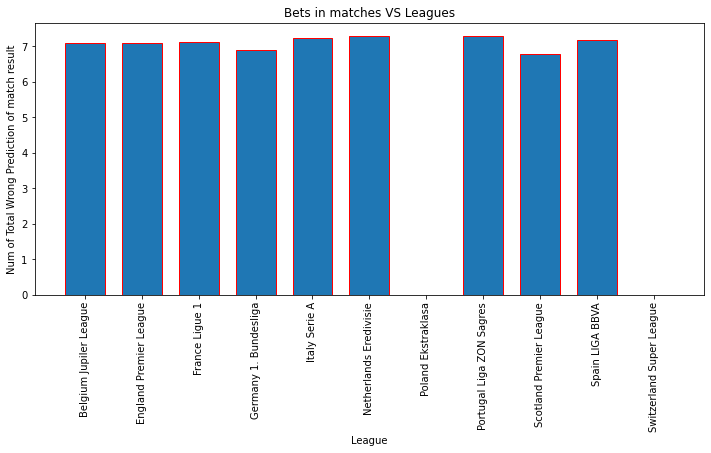

In [55]:
plt.subplots(figsize=(12, 5)) 
plt.bar(leagues, percent_wrong, width= 0.7, edgecolor='red')
plt.xticks(rotation='vertical')
plt.xlabel('League')
plt.ylabel('Num of Total Wrong Prediction of match result')
plt.title('Bets in matches VS Leagues');

In [56]:
# get the max league with wrong bets

print("The most wrongs bets percentage in: ", leagues[percent_wrong.index(max(percent_wrong))])

The most wrongs bets percentage in:  Portugal Liga ZON Sagres


<a id='conclusions'></a>
## Conclusions

> In Question 1, I found that the highest mean score over the whole period is FC Barcelona, but Bayern Munchen got the highest score every season 2 times, although Barclona got it only one time, so Bayern Munchen got the best club in the period of 2008 to 2016. 

> In Question 2, I focused on getting the total bets of every website in one match and compare it with the actual match results, and then got the total of all websites. I found the Spain League is the most unpredicted league matches, but the Portugal liga has the highest value of wrong bets percentage.

### Limitations
> I divided the dataframe into two dataframes and then dropped the null values of the second dataframe. 

## Submitting your Project 

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1